In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

<b>Exploratory data analysis</b>

In [2]:
df = pd.read_csv("mushrooms.csv", delimiter=',', nrows = 70000)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.shape

(8124, 23)

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df.replace('?',np.nan,inplace=True)

In [9]:
pd.DataFrame({'Count':df.isnull().sum(),'% Missing':df.isnull().sum()/df.shape[0]*100})

,Count,% Missing
class,0,0.000000
cap-shape,0,0.000000
cap-surface,0,0.000000
cap-color,0,0.000000
bruises,0,0.000000
odor,0,0.000000
gill-attachment,0,0.000000
gill-spacing,0,0.000000
gill-size,0,0.000000
gill-color,0,0.000000


Text(0.5, 1.0, 'Mushroom class distribution')

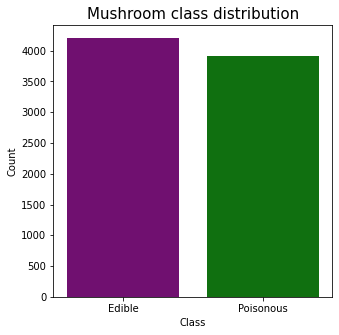

In [10]:
#graph size
plt.figure(figsize=(5, 5))   

#graph attributes
splot = sns.countplot(data=df, x='class', order=df['class'].value_counts().index, 
                      palette=['purple', 'green'], linewidth=2)   
#x-axis labels for the categories
splot.set_xticklabels(['Edible', 'Poisonous'])                         

#y-axis and x-axis label
plt.ylabel('Count')                                                    
plt.xlabel('Class')     

#title
plt.title('Mushroom class distribution', fontsize=15)                  
#every graph from here on uses this same format

Overall, the dataset is fairly evenly split into poisonous and edible

Text(0.5, 1.0, 'Mushroom distribution by class and cap shape')

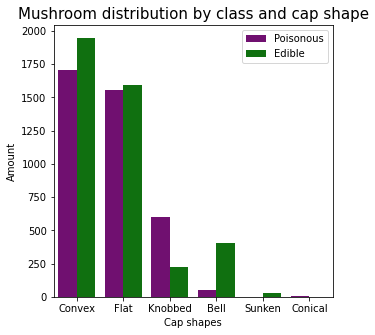

In [11]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='cap-shape', hue='class', order=df['cap-shape'].value_counts().index, 
                      palette=['purple', 'green'], linewidth=2)                  
splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

#legend for the graph
plt.legend(['Poisonous', 'Edible'], loc='upper right')                 
plt.ylabel('Amount')
plt.xlabel('Cap shapes')
plt.title('Mushroom distribution by class and cap shape', fontsize=15)

Convex cap shape is the most frequently occuring cap shape<br>
Convex and Flat contain similar distributions for poisonous and edible<br>
Knobbed and Bell are unevenly distributed

Text(0.5, 1.0, 'Mushroom distribution by class and bruise type')

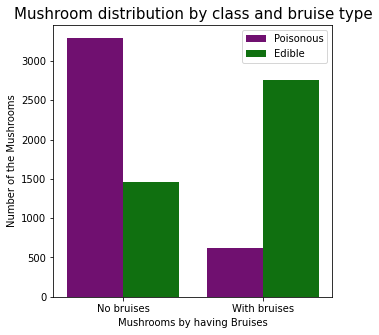

In [12]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='bruises', hue='class', order=df['bruises'].value_counts().index, 
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['No bruises', 'With bruises'])   

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms')
plt.xlabel('Mushrooms by having Bruises')
plt.title('Mushroom distribution by class and bruise type', fontsize=15)

Mushrooms with no bruises contain more poisonous mushrooms; vice versa for mushrooms with bruises

Text(0.5, 1.0, 'Mushroom distribution by class and odor')

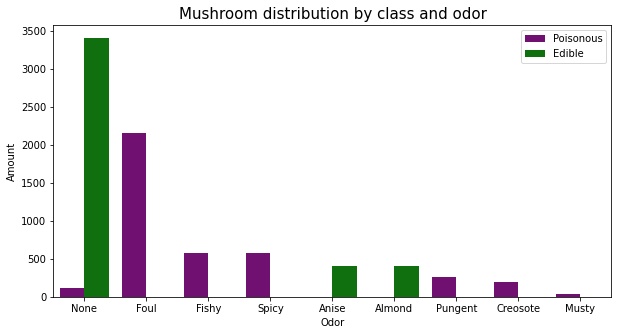

In [13]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=df, x='odor', hue='class', order=df['odor'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['None', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent',
                       'Creosote', 'Musty'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Odor')
plt.title('Mushroom distribution by class and odor', fontsize=15)

No odor contains many more edible mushrooms than poisonous<br>
Foul, Fishy, Spicy, Pungent, Creosote, and musty odors only contain poisonous<br>
Anise and Almond contain only edible<br>

Text(0.5, 1.0, 'Mushroom distribution by class and gill attachment type')

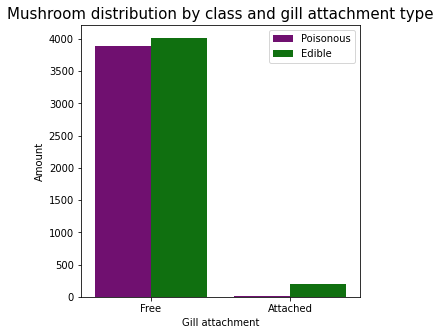

In [14]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='gill-attachment', hue='class', order=df['gill-attachment'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Free', 'Attached'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Gill attachment')
plt.title('Mushroom distribution by class and gill attachment type', fontsize=15)

Free contains similar amounts of poisonous and edible

Text(0.5, 1.0, 'Mushroom distribution by class and gill spacing')

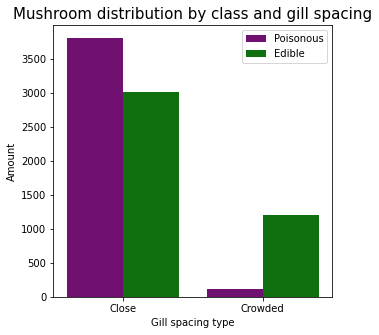

In [15]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='gill-spacing', hue='class', order=df['gill-spacing'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Close', 'Crowded'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Gill spacing type')
plt.title('Mushroom distribution by class and gill spacing', fontsize=15)

Close contains more poisonous than edible; Crowded is the opposite

Text(0.5, 1.0, 'Mushroom distribution by class and gill color')

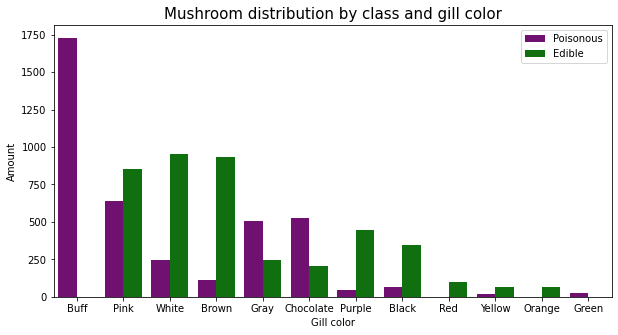

In [16]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=df, x='gill-color', hue='class', order=df['gill-color'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)   
splot.set_xticklabels(['Buff', 'Pink', 'White', 'Brown', 'Gray', 'Chocolate', 'Purple', 'Black', 'Red',
                       'Yellow', 'Orange', 'Green'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Gill color')
plt.title('Mushroom distribution by class and gill color', fontsize=15)

Buff contains only poisonous<br>
White, Brown, Purple, Black, Red contain more edible

Text(0.5, 1.0, 'Mushroom distribution by class and stalk type')

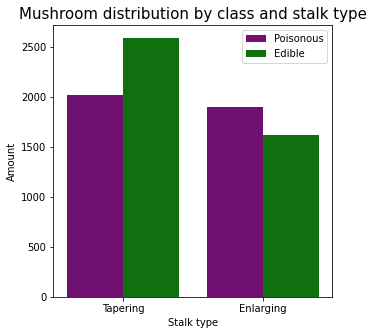

In [17]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='stalk-shape', hue='class', order=df['stalk-shape'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)    
splot.set_xticklabels(['Tapering', 'Enlarging'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Stalk type')
plt.title('Mushroom distribution by class and stalk type', fontsize=15)

Tapering contains more edible<br>
Enlarging contains more poisonous

Text(0.5, 1.0, 'Mushroom distribution by class and stalk root type')

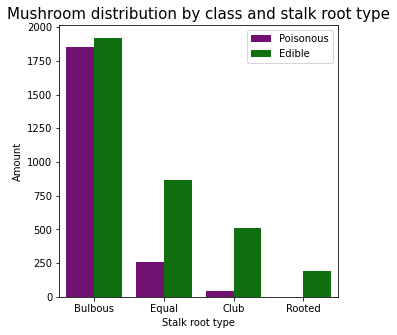

In [18]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='stalk-root', hue='class', order=df['stalk-root'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Bulbous', 'Equal', 'Club', 'Rooted'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Stalk root type')
plt.title('Mushroom distribution by class and stalk root type', fontsize=15)

Bulbous contains more poisonous<br>
Equal, Club, and Rooted contain more edible

Text(0.5, 1.0, 'Mushroom distribution by class and stalk surface type (above ring)')

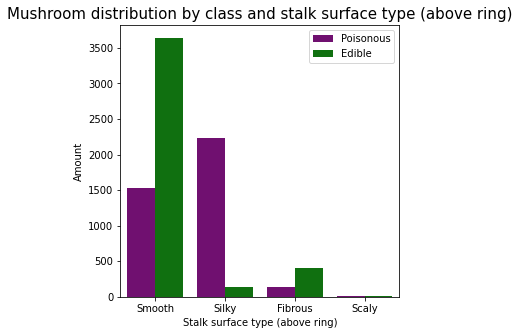

In [19]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='stalk-surface-above-ring', hue='class', order=df['stalk-surface-above-ring'].value_counts().index,
                        palette=['purple', 'green'], linewidth=2)                      
splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Stalk surface type (above ring)')
plt.title('Mushroom distribution by class and stalk surface type (above ring)', fontsize=15)

Smooth and Fibrous mostly edible<br>
Silky is mostly poisonous<br>
Scaly is evenly distributed between the classes

Text(0.5, 1.0, 'Mushroom distribution by class and stalk surface type (below ring)')

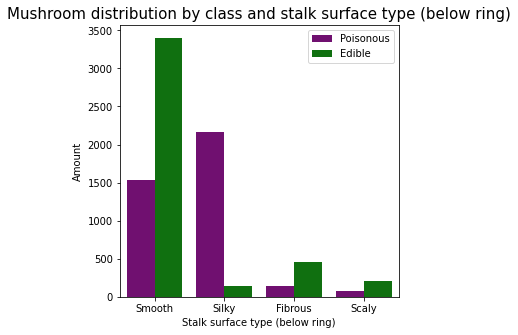

In [20]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='stalk-surface-below-ring', hue='class', order=df['stalk-surface-below-ring'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Stalk surface type (below ring)')
plt.title('Mushroom distribution by class and stalk surface type (below ring)', fontsize=15)

Smooth and Fibrous still contain more edible than poisonous, but now scaly is included<br>
Silky is the same as above ring

Text(0.5, 1.0, 'Mushroom distribution by class and veil type')

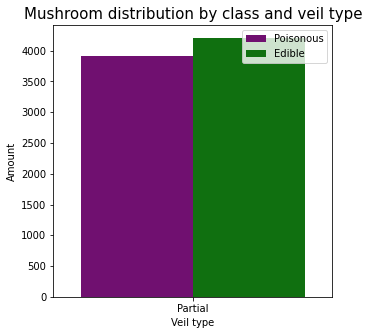

In [21]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='veil-type', hue='class', order=df['veil-type'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Partial'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Veil type')
plt.title('Mushroom distribution by class and veil type', fontsize=15)

There is only one veil type<br>
Contains more edible than poisonous but it is almost an even split

Text(0.5, 1.0, 'Mushroom distribution by class and veil color')

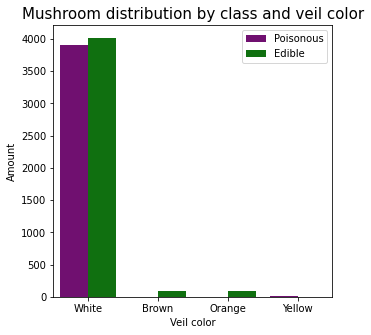

In [22]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='veil-color', hue='class', order=df['veil-color'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['White', 'Brown', 'Orange', 'Yellow'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Veil color')
plt.title('Mushroom distribution by class and veil color', fontsize=15)

White is the most common colour by far and is almost evenly distributed between the classes<br>
Brown and Orange are exclusively edible<br>
Yellow is only poisonous

Text(0.5, 1.0, 'Mushroom distribution by class and ring type')

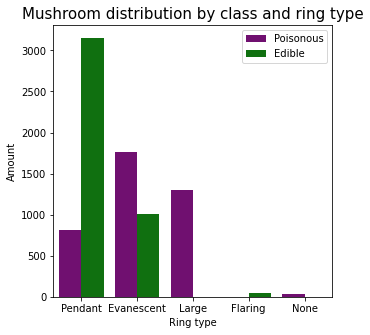

In [23]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='ring-type', hue='class', order=df['ring-type'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Pendant', 'Evanescent', 'Large', 'Flaring', 'None'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Ring type')
plt.title('Mushroom distribution by class and ring type', fontsize=15)

Pendant and Flaring are mostly edible<br>
All other ring types are mostly poisonous

Text(0.5, 1.0, 'Mushroom distribution by class and spore print color')

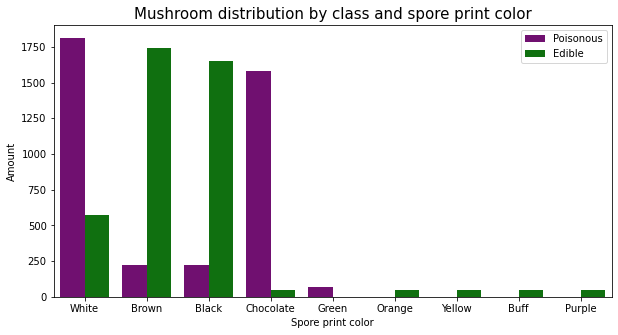

In [24]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=df, x='spore-print-color', hue='class', order=df['spore-print-color'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['White', 'Brown', 'Black', 'Chocolate', 'Green', 'Orange', 'Yellow', 'Buff', 'Purple'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Spore print color')
plt.title('Mushroom distribution by class and spore print color', fontsize=15)

White, Chocolate, and Green are mostly piosonous<br>
All other colors are mostly edible

Text(0.5, 1.0, 'Mushroom distribution by class and population')

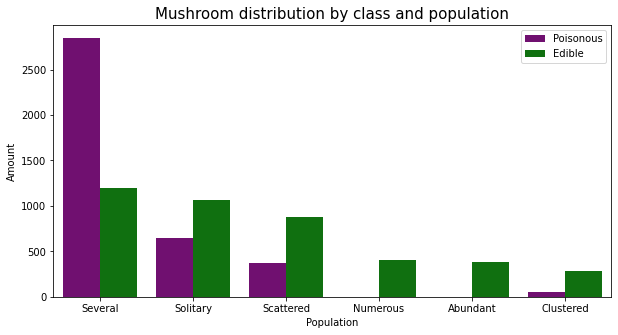

In [25]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=df, x='population', hue='class', order=df['population'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Population')
plt.title('Mushroom distribution by class and population', fontsize=15)

Mushrooms with several populations are more likely to be poisonous<br>
Numerious and Abundant are exclusively edible

Text(0.5, 1.0, 'Mushroom distribution by class and habitat')

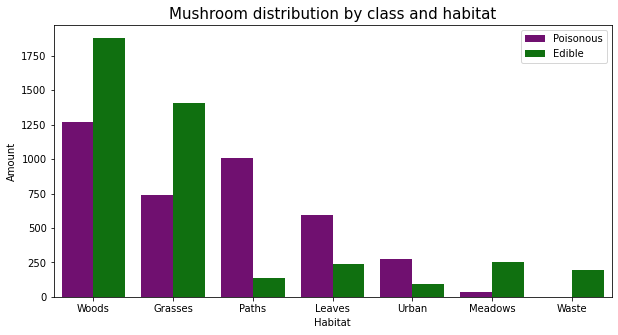

In [26]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=df, x='habitat', hue='class', order=df['habitat'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Habitat')
plt.title('Mushroom distribution by class and habitat', fontsize=15)

Mushrooms found in Woods, Grasses and Meadows are more likely to be edible<br>
Paths, Leaves, and Urban are more likely to be poisonous<br>
Waste is exclusively edible

<hr>

<b>Preprocessing</b>

In [27]:
#y becomes a dataframe containing our target variables
y = df['class']

#X just has everything else
X = df.drop(['class'],axis=1)

X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


<hr>

<b>Algorithms and evaluation</b>

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#labelencoder SHOULD NOT be used for feature variables; only target variables
#turning the categorical attributes into numeric so that we can calculate entropy
en = LabelEncoder()
y = en.fit_transform(y)

In [29]:
X = pd.get_dummies(X)    #this is necessary because our categorical variables cannot be read into an equation

In [30]:
X.shape

(8124, 116)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<hr>

<b>Decision tree (entropy)</b>

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

In [33]:
#creating decision tree
dTree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)  
dTree.fit(X_train, y_train)

#creating variable to store predictions
t_pred = dTree.predict(X_test)                                                    

In [34]:
#predict probabilities for the test data
tree_probs = dTree.predict_proba(X_test)

#keep probabilities of the positive class only
tree_probs = tree_probs[:, 1]

#compute the AUC Score
tree_auc = roc_auc_score(y_test, tree_probs)
print('AUC: %.2f' % tree_auc)

AUC: 0.99


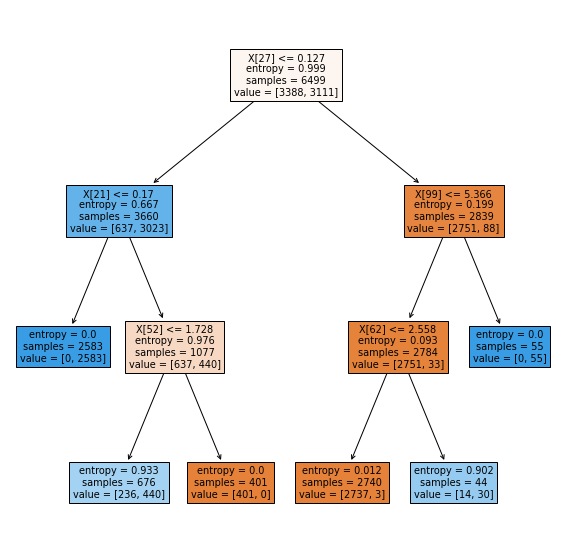

In [35]:
#plotting the decision tree graphically
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dTree, filled=True)

<hr>

<b>KNN</b>

In [36]:
from sklearn.neighbors import KNeighborsClassifier
#creating KNN
kclass = KNeighborsClassifier(n_neighbors=3, n_jobs= -1)
kclass.fit(X_train, y_train)

#storing predictions in variable
y_pred = kclass.predict(X_test)

In [37]:
#predict probabilities for the test data
knn_probs = kclass.predict_proba(X_test)

#keep probabilities of the positive class only
knn_probs = knn_probs[:, 1]

#compute the AUC Score
kclass_auc = roc_auc_score(y_test, knn_probs)
print('AUC: %.2f' % kclass_auc)

AUC: 1.00


<b>Bayes</b>

In [38]:
from sklearn.naive_bayes import GaussianNB
#creating Bayes
gnb = GaussianNB()

#storing predictions in variable
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)


In [39]:
#predict probabilities for the test data
gnb_probs = gnb.predict_proba(X_test)

#keep probabilities of the positive class only
gnb_probs = gnb_probs[:, 1]

#compute the AUC Score
gnb_auc = roc_auc_score(y_test, gnb_probs)
print('AUC: %.2f' % gnb_auc)

AUC: 1.00


<hr>

<b>Evaluation</b>

In [40]:
#confusion matrix for decision tree
print(confusion_matrix(y_test, t_pred))

#classification report
print(classification_report(y_test, t_pred))
print('The accuracy score is: ', accuracy_score(y_test, t_pred))

[[766  54]
 [  5 800]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       820
           1       0.94      0.99      0.96       805

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.97      0.96      0.96      1625

The accuracy score is:  0.9636923076923077


Text(0.5, 1.0, 'Confusion Matrix for Decision tree')

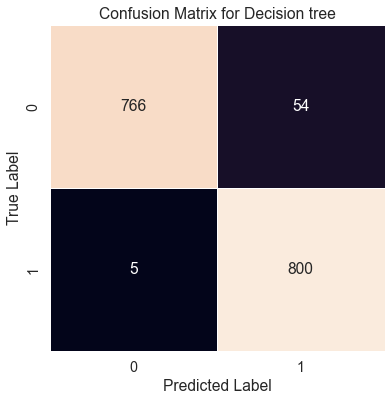

In [41]:
#graphical representation of the confusion matrix for decision tree
tree_matrix = confusion_matrix(y_test,t_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(6, 6))
sns.heatmap(tree_matrix,annot=True, cbar=False,linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree')

In [42]:
#confusion matrix KNN
print(confusion_matrix(y_test, y_pred))

#classification report
print(classification_report(y_test, y_pred))
print('The accuracy score is: ', accuracy_score(y_test, y_pred))

[[820   0]
 [  2 803]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

The accuracy score is:  0.9987692307692307


Text(0.5, 1.0, 'Confusion Matrix for KNN')

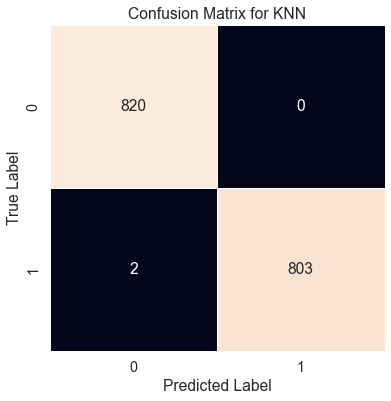

In [43]:
#graphical representation of KNN confusion matrix
knn_matrix = confusion_matrix(y_test,y_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(6, 6))
sns.heatmap(knn_matrix,annot=True, cbar=False,linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for KNN')

In [44]:
#confusion matrix for Bayes
print(confusion_matrix(y_test, gnb_pred))

#classification report
print(classification_report(y_test, gnb_pred))
print('The accuracy score is: ', accuracy_score(y_test, gnb_pred))

[[758  62]
 [  2 803]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       820
           1       0.93      1.00      0.96       805

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

The accuracy score is:  0.9606153846153846


Text(0.5, 1.0, 'Confusion Matrix for Bayes')

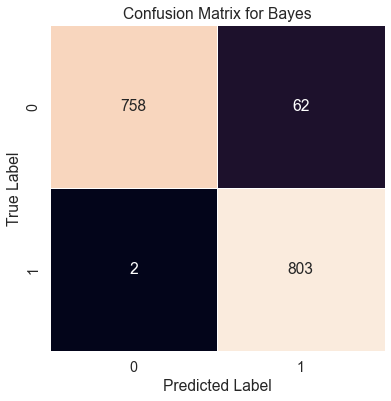

In [45]:
#graphical representation of Bayes confusion matrix
bayes_matrix = confusion_matrix(y_test,gnb_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(6, 6))
sns.heatmap(bayes_matrix,annot=True, cbar=False,linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Bayes')

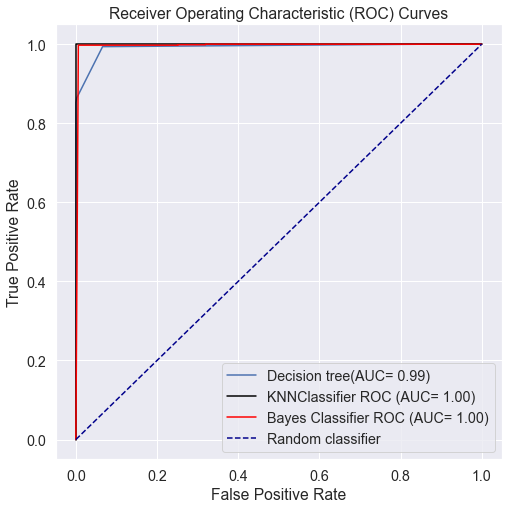

In [46]:
#get the ROC curves
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, tree_probs)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_probs)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gnb_probs)

#plotting the ROC curves
plt.figure(figsize=(8,8))
plt.plot(dt_fpr, dt_tpr, label='Decision tree(AUC= %0.2f)'% tree_auc)
plt.plot(knn_fpr, knn_tpr, color='black', label='KNNClassifier ROC (AUC= %0.2f)'% kclass_auc)
plt.plot(fpr_gnb, tpr_gnb, color='Red', label='Bayes Classifier ROC (AUC= %0.2f)'% gnb_auc)

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()